In this notebook I demonstrate the 2D uniform discrete curvelet transform on zoneplate image. 
First I create the test image and ucurv object to contain all transform parameters

In [2]:
from ucurv import *
from notebook.zoneplate import *
import matplotlib.pyplot as plt
sz = [512, 512]
cfg = [[3, 3], [6,3], [12, 6]]
res = len(cfg)
rsq = zoneplate(sz)
img = rsq - np.mean(rsq)

udct = udct(sz, cfg, complex = True)


ModuleNotFoundError: No module named 'notebook.zoneplate'

The forward transform is called by ucurvfwd, the output is a dictionary of a low band and multiple directional bands.
the ucurv2d_show compiles all the band to a single image for display

In [ ]:
imband = ucurvfwd(img, udct)
plt.figure(figsize = (20, 60))
# plt.imshow(np.abs(ucurv2d_show(imband, udct))) 
print(imband.keys())

dict_keys([0, (0, 0, 0), (0, 2, 0), (0, 0, 1), (0, 2, 1), (0, 0, 2), (0, 2, 2), (0, 1, 0), (0, 3, 0), (0, 1, 1), (0, 3, 1), (0, 1, 2), (0, 3, 2), (1, 0, 0), (1, 2, 0), (1, 0, 1), (1, 2, 1), (1, 0, 2), (1, 2, 2), (1, 1, 0), (1, 3, 0), (1, 1, 1), (1, 3, 1), (1, 1, 2), (1, 3, 2), (1, 1, 3), (1, 3, 3), (1, 1, 4), (1, 3, 4), (1, 1, 5), (1, 3, 5), (2, 0, 0), (2, 2, 0), (2, 0, 1), (2, 2, 1), (2, 0, 2), (2, 2, 2), (2, 0, 3), (2, 2, 3), (2, 0, 4), (2, 2, 4), (2, 0, 5), (2, 2, 5), (2, 1, 0), (2, 3, 0), (2, 1, 1), (2, 3, 1), (2, 1, 2), (2, 3, 2), (2, 1, 3), (2, 3, 3), (2, 1, 4), (2, 3, 4), (2, 1, 5), (2, 3, 5), (2, 1, 6), (2, 3, 6), (2, 1, 7), (2, 3, 7), (2, 1, 8), (2, 3, 8), (2, 1, 9), (2, 3, 9), (2, 1, 10), (2, 3, 10), (2, 1, 11), (2, 3, 11)])


<Figure size 2000x6000 with 0 Axes>

The inverse transform is called by ucurvinv, and the reconstruction is exact

1.9004216811335795e-07


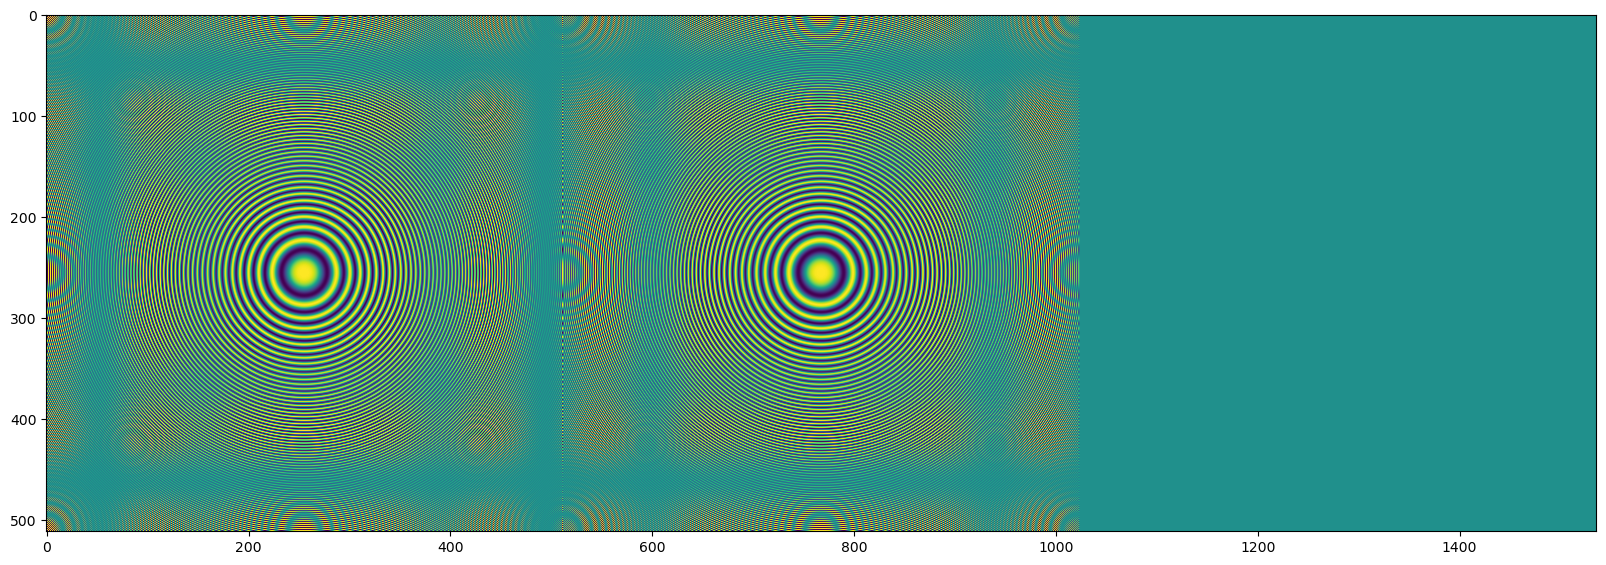

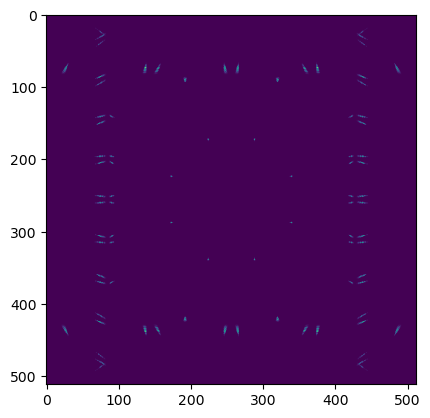

In [ ]:

recon = ucurvinv(imband, udct)

err = img - recon
print(np.max(np.abs(err)))
plt.figure(figsize = (20, 60))
plt.imshow(np.real(np.concatenate((img, recon, err), axis = 1)))

plt.figure()
plt.imshow(np.abs(np.fft.fftshift(np.fft.fftn(err))))   